## **CLASSIFICATION OF PISTACHIO TYPES USING GEOMETRIC AND SHAPE RELATED MEASURMENTS**

**Problem** **Statment**

To build a predictive system which classifies pistachio's based on their geometric and shape related measurements.

**Description of the dataset and Data loading**

The provided dataset consists a comprehensive list of column headers or variables, detailing geometric and shape-related measurements for each observation, complemented by a class label assigned to each instance:
1. AREA: The area measurement of a geometric object.
2. PERIMETER: The perimeter measurement of a geometric object.
3. MAJOR_AXIS: The measurement of the major axis of the object.
4. MINOR_AXIS: The measurement of the minor axis of the object.
5. ECCENTRICITY: The eccentricity of the object, which measures how elongated or flat it is.
6. EQDIASQ: Equivalent diameter or square root of four times the area divided by pi.
7. SOLIDITY: A measure of how solid the object is, calculated as the ratio of the object's area to the convex hull area.
8. CONVEX_AREA: The area of the convex hull of the object.
9. EXTENT: The ratio of the object's area to the bounding box area.
10. ASPECT_RATIO: The ratio of the major axis length to the minor axis length.
11. ROUNDNESS: A measure of how close the object is to a perfect circle.
12. COMPACTNESS: A measure of how compact the object is, calculated as the ratio of the object's perimeter squared to its area.
13. SHAPEFACTOR_1, SHAPEFACTOR_2, SHAPEFACTOR_3, SHAPEFACTOR_4: Shape factors that describe different geometric properties of the object.
14. Class: The class label or category associated with the object.

**Importing Necessary libraries**

In [2]:
#Data Manipulation
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model

# converting categorical values into numericaal columns(data preprocessing)
from sklearn.preprocessing import OneHotEncoder

# Splitting the training and testing data
from sklearn.model_selection import train_test_split

#Model Building
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Boosting techniques
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Checking model performance
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

#Scaling the data
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler



**Importing dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the dataset**

In [4]:
data_set=pd.read_csv("/content/pistachio.csv")
data_set.head()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  73107  1161.8070    442.4074    217.7261        0.8705  305.0946    0.9424   
1  89272  1173.1810    460.2551    251.9546        0.8369  337.1419    0.9641   
2  60955   999.7890    386.9247    209.1255        0.8414  278.5863    0.9465   
3  79537  1439.5129    466.7973    221.2136        0.8806  318.2289    0.9437   
4  96395  1352.6740    515.8730    246.5945        0.8784  350.3340    0.9549   

   CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  SHAPEFACTOR_1  \
0        77579  0.7710        2.0319     0.6806       0.6896         0.0061   
1        92598  0.7584        1.8267     0.8151       0.7325         0.0052   
2        64400  0.7263        1.8502     0.7663       0.7200         0.0063   
3        84281  0.7568        2.1102     0.4823       0.6817         0.0059   
4       100950  0.7428        2.0920     0.6620       0.6791         0.0054   

   SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4              Class  
0         0.0030         0.4756         0.9664  Kirmizi_Pistachio  
1         0.0028         0.5366         0.9802     Siit_Pistachio  
2         0.0034         0.5184         0.9591  Kirmizi_Pistachio  
3         0.0028         0.4648         0.9807  Kirmizi_Pistachio  
4         0.0026         0.4612         0.9648  Kirmizi_Pistachio

**Understanding the dataset**

In [5]:
data_set.describe(include='all')

AREA    PERIMETER   MAJOR_AXIS   MINOR_AXIS  ECCENTRICITY  \
count     1718.000000  1718.000000  1718.000000  1718.000000   1718.000000   
unique            NaN          NaN          NaN          NaN           NaN   
top               NaN          NaN          NaN          NaN           NaN   
freq              NaN          NaN          NaN          NaN           NaN   
mean     79871.952852  1421.797588   446.206444   238.193128      0.840347   
std      12968.217051   373.408835    31.885328    30.426445      0.049026   
min      29808.000000   858.363000   321.425500   133.509600      0.504900   
25%      71898.500000  1169.633225   426.554100   217.875475      0.817500   
50%      79795.000000  1260.785500   448.453150   235.888750      0.850250   
75%      88980.000000  1599.479000   467.515200   257.433625      0.875375   
max     124008.000000  2755.049100   535.642200   383.046100      0.946000   

            EQDIASQ     SOLIDITY    CONVEX_AREA       EXTENT  ASPECT_RATIO  \
count   1718.000000  1718.000000    1718.000000  1718.000000   1718.000000   
unique          NaN          NaN            NaN          NaN           NaN   
top             NaN          NaN            NaN          NaN           NaN   
freq            NaN          NaN            NaN          NaN           NaN   
mean     317.790000     0.940103   84947.671129     0.716055      1.899342   
std       26.571699     0.050006   13081.742551     0.052534      0.241253   
min      194.814600     0.588000   37935.000000     0.427200      1.158500   
25%      302.562375     0.920250   76357.750000     0.688100      1.736325   
50%      318.744650     0.953800   84973.000000     0.726100      1.899550   
75%      336.590000     0.976300   93660.750000     0.753600      2.068575   
max      397.356100     0.995100  132478.000000     0.820400      3.085800   

          ROUNDNESS  COMPACTNESS  SHAPEFACTOR_1  SHAPEFACTOR_2  SHAPEFACTOR_3  \
count   1718.000000  1718.000000    1718.000000    1718.000000    1718.000000   
unique          NaN          NaN            NaN            NaN            NaN   
top             NaN          NaN            NaN            NaN            NaN   
freq            NaN          NaN            NaN            NaN            NaN   
mean       0.570831     0.712841       0.005704       0.003017       0.510097   
std        0.211514     0.044230       0.000810       0.000334       0.063391   
min        0.062800     0.476000       0.004000       0.002400       0.226600   
25%        0.372325     0.682000       0.005200       0.002800       0.465125   
50%        0.643850     0.709750       0.005600       0.003000       0.503750   
75%        0.744450     0.741600       0.006100       0.003200       0.549975   
max        0.933600     0.869500       0.013100       0.005300       0.756100   

        SHAPEFACTOR_4              Class  
count     1718.000000               1718  
unique            NaN                  2  
top               NaN  Kirmizi_Pistachio  
freq              NaN                998  
mean         0.955185                NaN  
std          0.051735                NaN  
min          0.620400                NaN  
25%          0.944200                NaN  
50%          0.972800                NaN  
75%          0.986800                NaN  
max          0.999000                NaN

In [6]:
data_set.shape

(1718, 17)

Pistachio dataset have 1718 rows and 17 columns.

In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1718 non-null   int64  
 1   PERIMETER      1718 non-null   float64
 2   MAJOR_AXIS     1718 non-null   float64
 3   MINOR_AXIS     1718 non-null   float64
 4   ECCENTRICITY   1718 non-null   float64
 5   EQDIASQ        1718 non-null   float64
 6   SOLIDITY       1718 non-null   float64
 7   CONVEX_AREA    1718 non-null   int64  
 8   EXTENT         1718 non-null   float64
 9   ASPECT_RATIO   1718 non-null   float64
 10  ROUNDNESS      1718 non-null   float64
 11  COMPACTNESS    1718 non-null   float64
 12  SHAPEFACTOR_1  1718 non-null   float64
 13  SHAPEFACTOR_2  1718 non-null   float64
 14  SHAPEFACTOR_3  1718 non-null   float64
 15  SHAPEFACTOR_4  1718 non-null   float64
 16  Class          1718 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 22

In [8]:
data_set.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class'],
      dtype='object')

In [9]:
data_set.isnull().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64

There are no null values in the given dataset.

In [10]:
data_set["Class"].value_counts()

Class
Kirmizi_Pistachio    998
Siit_Pistachio       720
Name: count, dtype: int64

Here we can see that the count of Kirmizi_Pistachio is high than Siit_Pistachio.

**Copying the dataset**

In [11]:
df=data_set.copy()
df.head()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  73107  1161.8070    442.4074    217.7261        0.8705  305.0946    0.9424   
1  89272  1173.1810    460.2551    251.9546        0.8369  337.1419    0.9641   
2  60955   999.7890    386.9247    209.1255        0.8414  278.5863    0.9465   
3  79537  1439.5129    466.7973    221.2136        0.8806  318.2289    0.9437   
4  96395  1352.6740    515.8730    246.5945        0.8784  350.3340    0.9549   

   CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  SHAPEFACTOR_1  \
0        77579  0.7710        2.0319     0.6806       0.6896         0.0061   
1        92598  0.7584        1.8267     0.8151       0.7325         0.0052   
2        64400  0.7263        1.8502     0.7663       0.7200         0.0063   
3        84281  0.7568        2.1102     0.4823       0.6817         0.0059   
4       100950  0.7428        2.0920     0.6620       0.6791         0.0054   

   SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4              Class  
0         0.0030         0.4756         0.9664  Kirmizi_Pistachio  
1         0.0028         0.5366         0.9802     Siit_Pistachio  
2         0.0034         0.5184         0.9591  Kirmizi_Pistachio  
3         0.0028         0.4648         0.9807  Kirmizi_Pistachio  
4         0.0026         0.4612         0.9648  Kirmizi_Pistachio

# **Exploratory Data Analysis**

**Barplot**

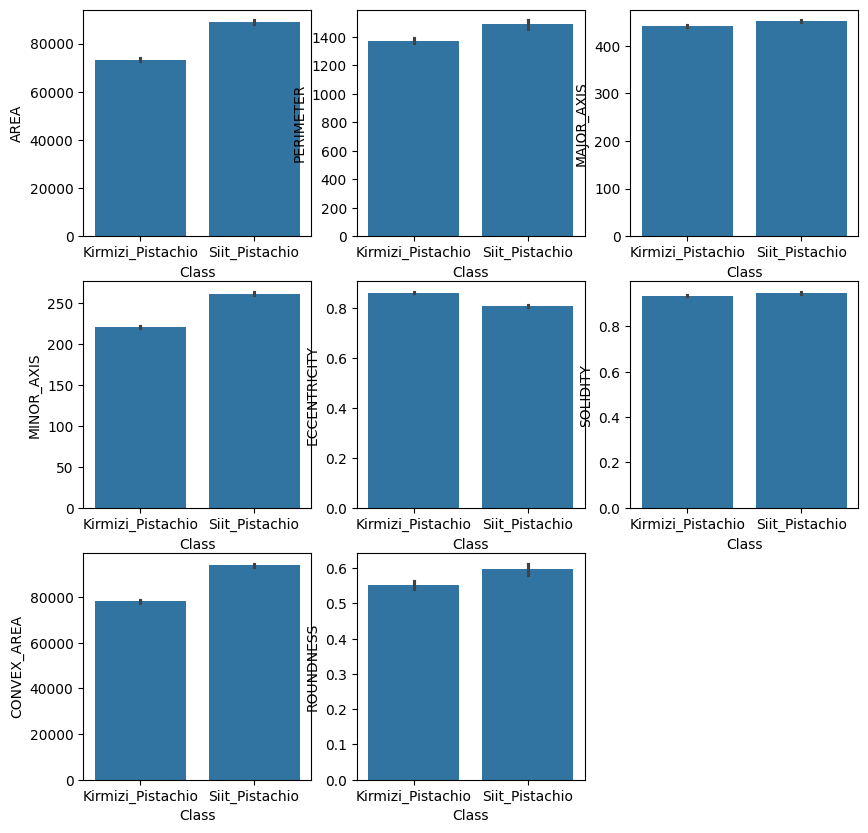

In [12]:
fig = plt.figure(figsize = (10,10))
plt.subplot(3,3,1)
sns.barplot(x = 'Class',y = 'AREA',data = df)
plt.subplot(3,3,2)
sns.barplot(x = 'Class',y = 'PERIMETER',data = df)
plt.subplot(3,3,3)
sns.barplot(x = 'Class',y = 'MAJOR_AXIS',data = df)
plt.subplot(3,3,4)
sns.barplot(x = 'Class',y = 'MINOR_AXIS',data = df)
plt.subplot(3,3,5)
sns.barplot(x = 'Class',y = 'ECCENTRICITY',data = df)
plt.subplot(3,3,6)
sns.barplot(x = 'Class',y = 'SOLIDITY',data = df)
plt.subplot(3,3,7)
sns.barplot(x = 'Class',y = 'CONVEX_AREA',data = df)
plt.subplot(3,3,8)
sns.barplot(x = 'Class',y = 'ROUNDNESS',data = df)
plt.show()

From the above figure we can say that 'AREA', 'CONVEX_AREA' and 'PERIMETER' have the most significant impact on distinguishing between the two 'CLASSes' when compared to 'MAJOR_AXIS', 'ECCENTRICITY' and 'ROUNDNESS'.

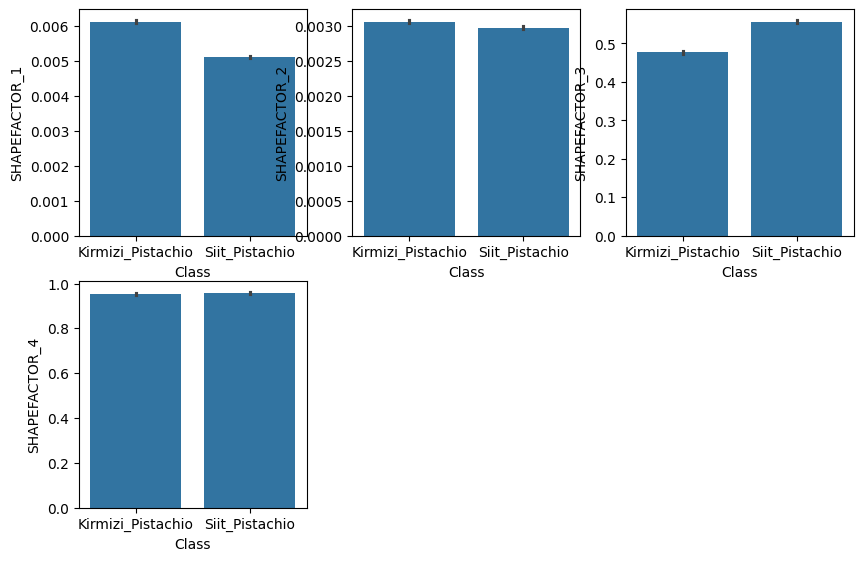

In [13]:
fig = plt.figure(figsize = (10,10))
plt.subplot(3, 3, 1)
sns.barplot(x='Class', y='SHAPEFACTOR_1', data=df)
plt.subplot(3, 3, 2)
sns.barplot(x='Class', y='SHAPEFACTOR_2', data=df)
plt.subplot(3, 3, 3)
sns.barplot(x='Class', y='SHAPEFACTOR_3', data=df)
plt.subplot(3, 3, 4)
sns.barplot(x='Class', y='SHAPEFACTOR_4', data=df)
plt.show()

From the above figure we can conclude that 'SHAPEFACTOR_3' and 'SHAPEFACTOR_4' have more impact on determining the 'CLASS' since they exhibit greater variation between the two types of pistachios.

**Countplot**

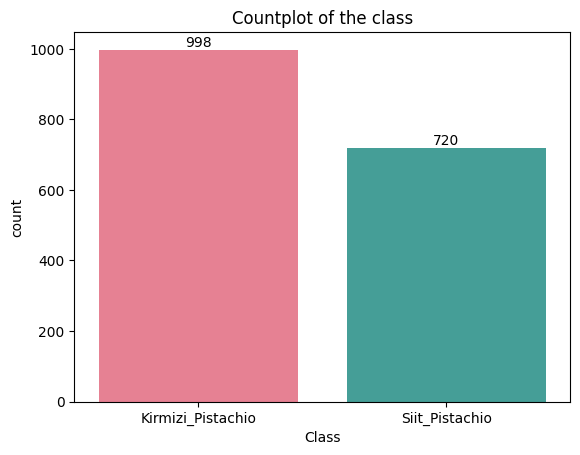

In [14]:
a=sns.countplot(x='Class',data=df,palette='husl')
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
plt.title("Countplot of the class")
plt.show()

The above graph shows that the count of 'Kirmizi_Pistachio' is greater than that of 'Siit_Pistachio'

**Boxplot**

<Axes: xlabel='Class', ylabel='AREA'>

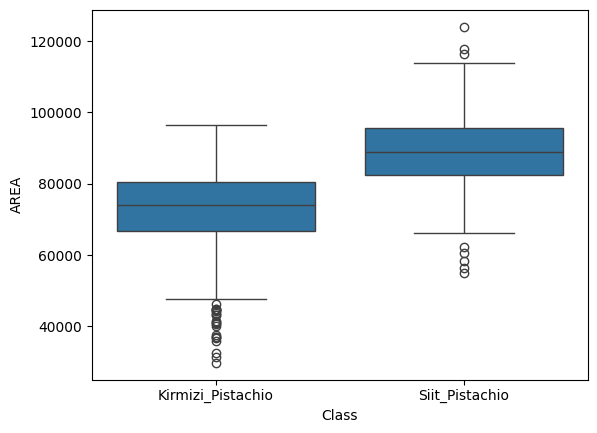

In [15]:
sns.boxplot(x='Class',y='AREA',data=df)

From the above graph we can observe that there are outliers present in the dataset.

**Histplot**

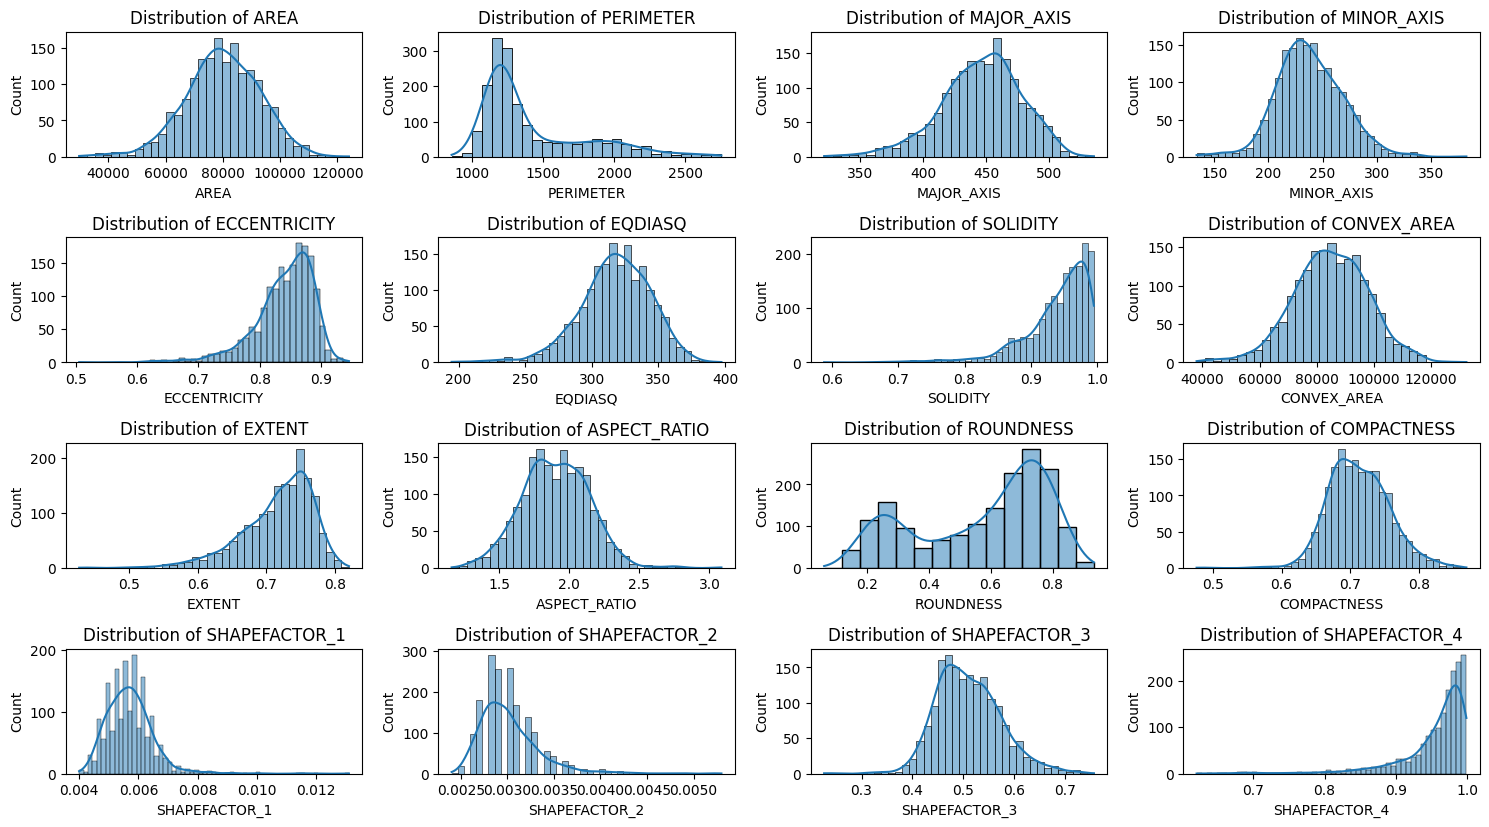

In [16]:
features=data_set.drop(columns=["Class"])                          # Dropping id and class column
plt.figure(figsize=(15, 10))                                      # Plotting the figure with dimension of 15,20
for i,feature in enumerate(features):
    plt.subplot(5, 4, i+1)                                        # Plotting the subplot with 4 rows and 3 columns
    sns.histplot(features[feature], kde=True,palette="bright")    # Plotting histplots with kde for each feature
    plt.title(f'Distribution of {feature}')                       # Writing the title for each subplot
plt.tight_layout()                                                # Adjusting the layout for better spacing
plt.show()

The histograms show the distributions of key attributes like AREA, PERIMETER, MAJOR_AXIS, MINOR_AXIS, and EQDIASQ. Most attributes display a roughly normal distribution, though some skewness is observed.

**Pairplot**

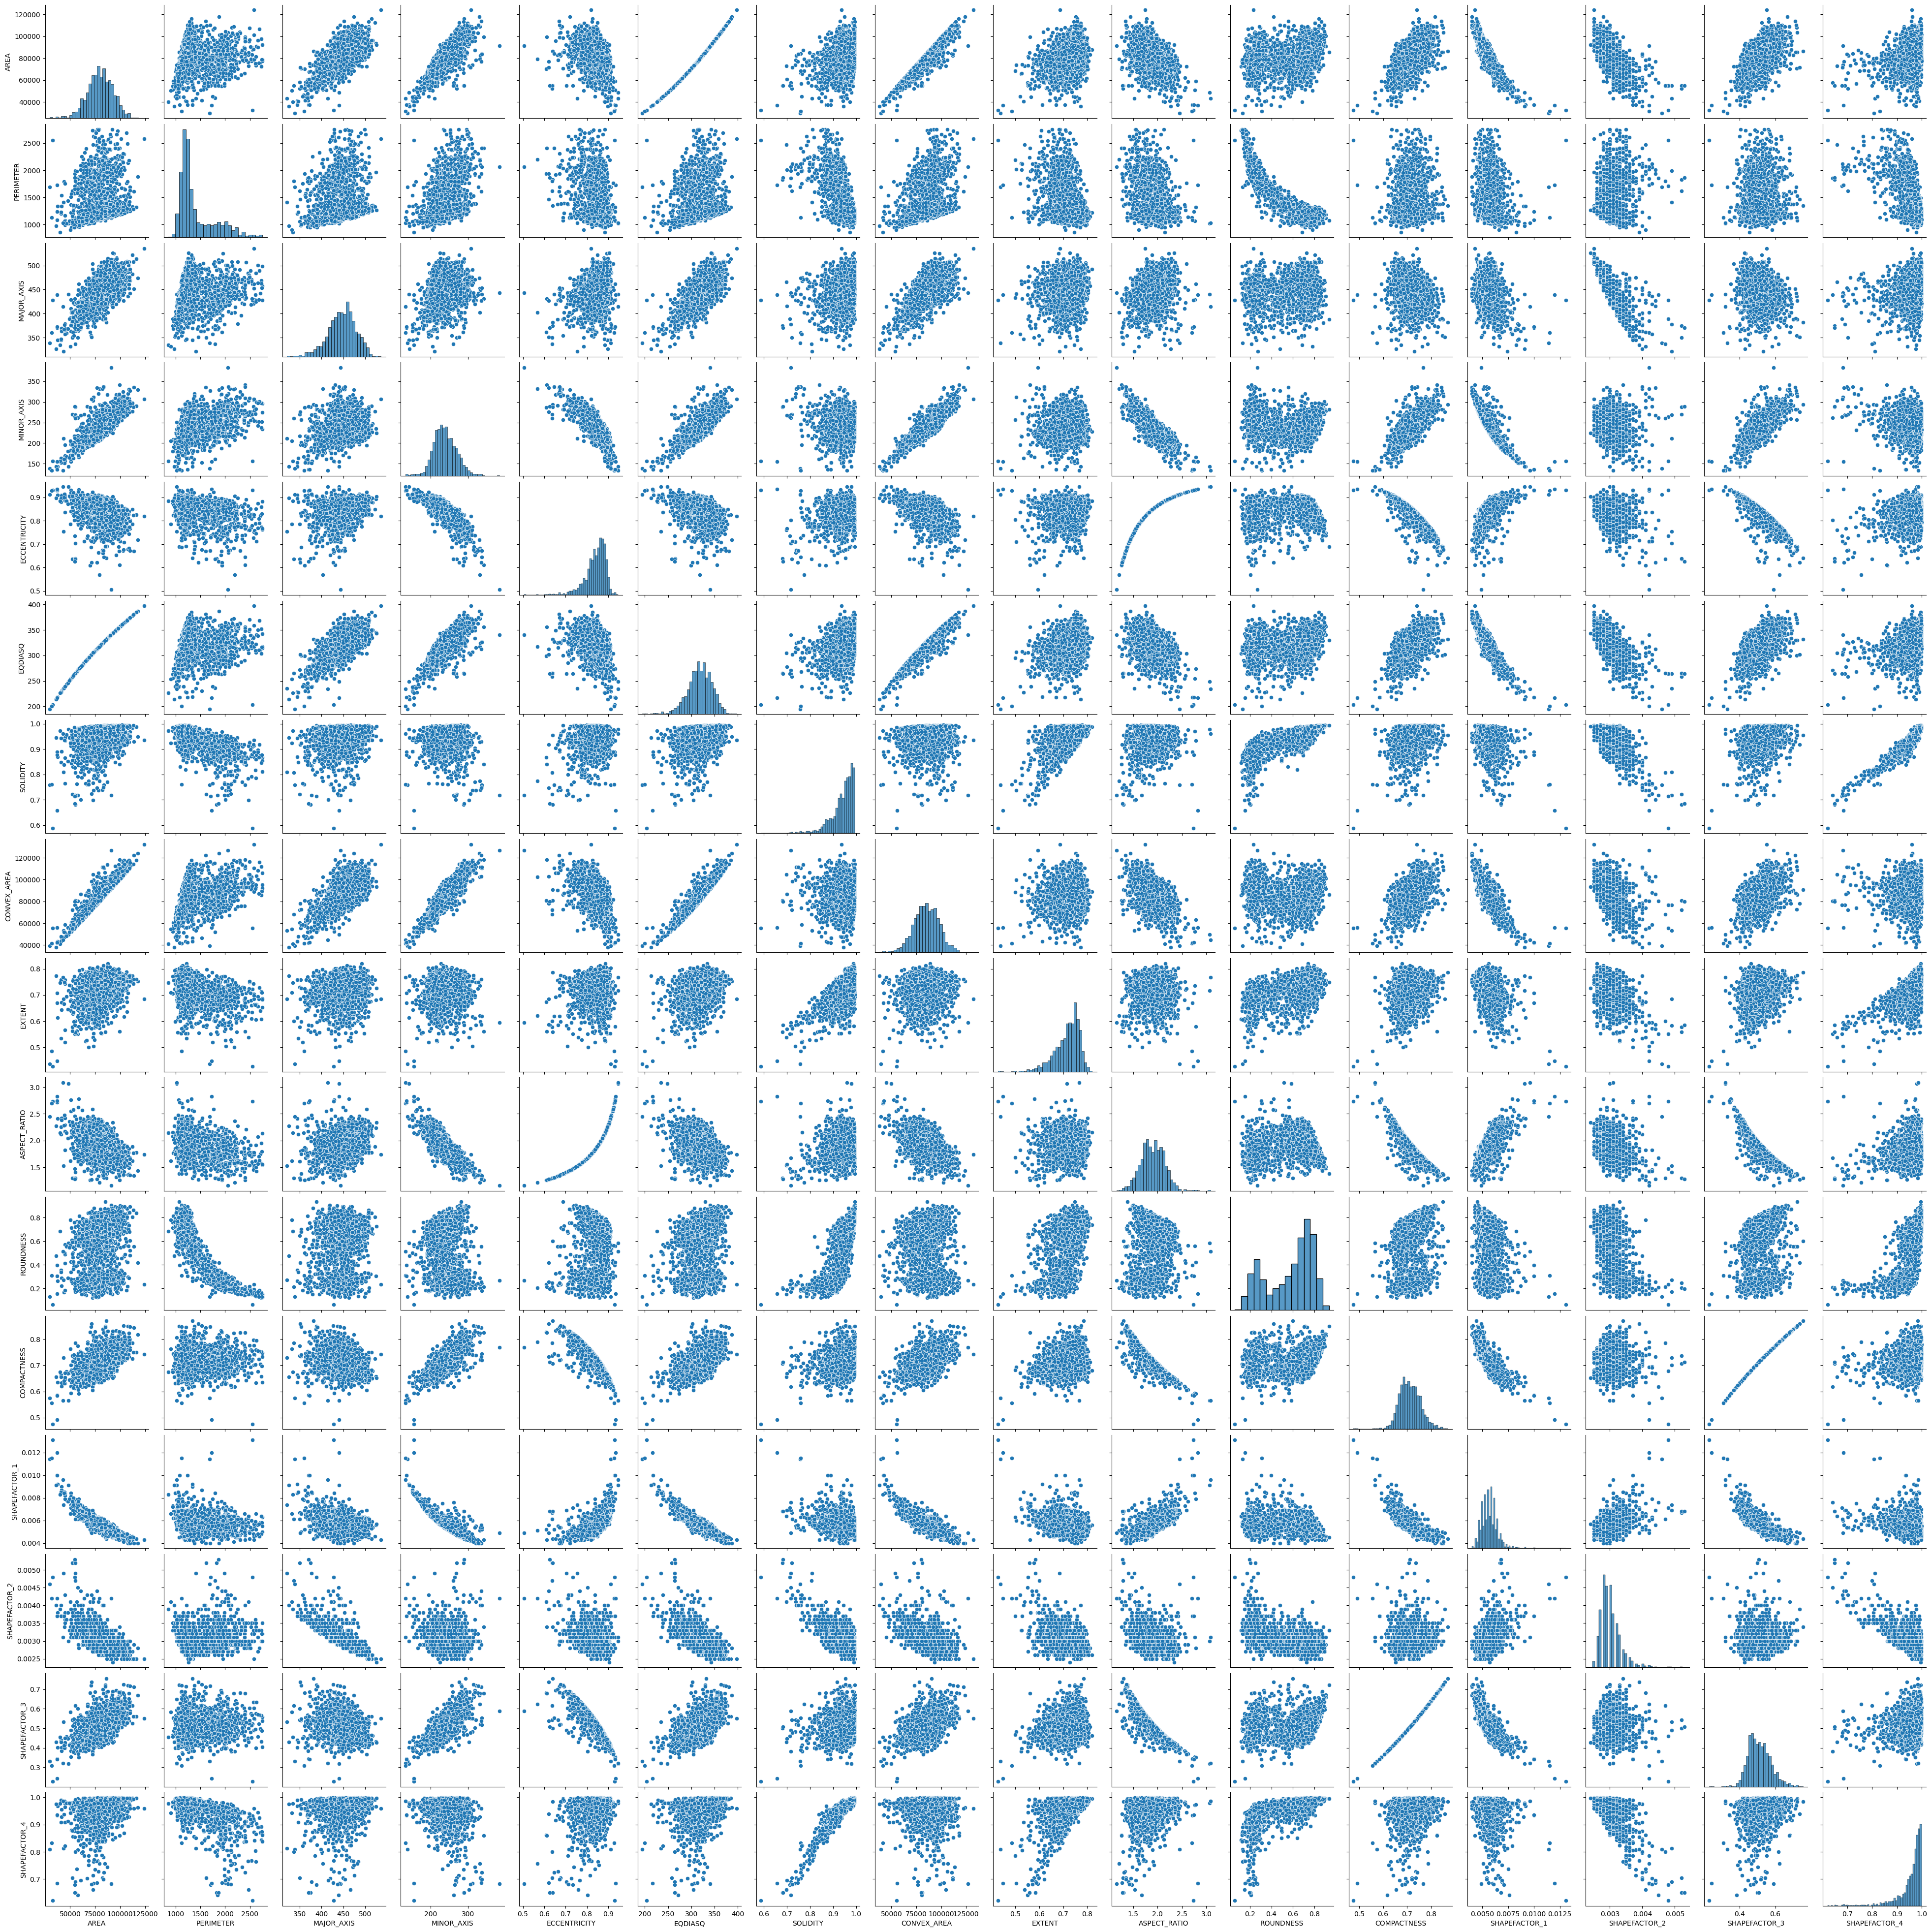

In [20]:
sns.pairplot(data_set)

**Piechart**

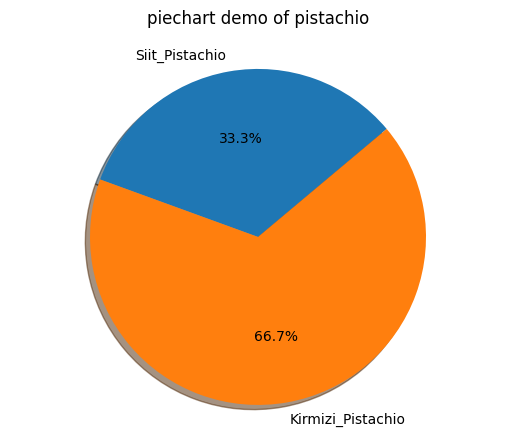

In [19]:
label=['Siit_Pistachio','Kirmizi_Pistachio']
sizes=[10,20]
plt.pie(sizes,labels=label,autopct='%1.1f%%',shadow=True,startangle=40,explode=[0,0])
plt.title("piechart demo of pistachio\n")
plt.axis('equal')
plt.show()

**Encoding target column**

In [21]:
ct = LabelEncoder()
# List of columns to encode
columns_to_encode = ['Class']

# Encode each column individually
for col in columns_to_encode:
    df[col] = ct.fit_transform(df[col])

df.head()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  73107  1161.8070    442.4074    217.7261        0.8705  305.0946    0.9424   
1  89272  1173.1810    460.2551    251.9546        0.8369  337.1419    0.9641   
2  60955   999.7890    386.9247    209.1255        0.8414  278.5863    0.9465   
3  79537  1439.5129    466.7973    221.2136        0.8806  318.2289    0.9437   
4  96395  1352.6740    515.8730    246.5945        0.8784  350.3340    0.9549   

   CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  SHAPEFACTOR_1  \
0        77579  0.7710        2.0319     0.6806       0.6896         0.0061   
1        92598  0.7584        1.8267     0.8151       0.7325         0.0052   
2        64400  0.7263        1.8502     0.7663       0.7200         0.0063   
3        84281  0.7568        2.1102     0.4823       0.6817         0.0059   
4       100950  0.7428        2.0920     0.6620       0.6791         0.0054   

   SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4  Class  
0         0.0030         0.4756         0.9664      0  
1         0.0028         0.5366         0.9802      1  
2         0.0034         0.5184         0.9591      0  
3         0.0028         0.4648         0.9807      0  
4         0.0026         0.4612         0.9648      0

**Heatmap**

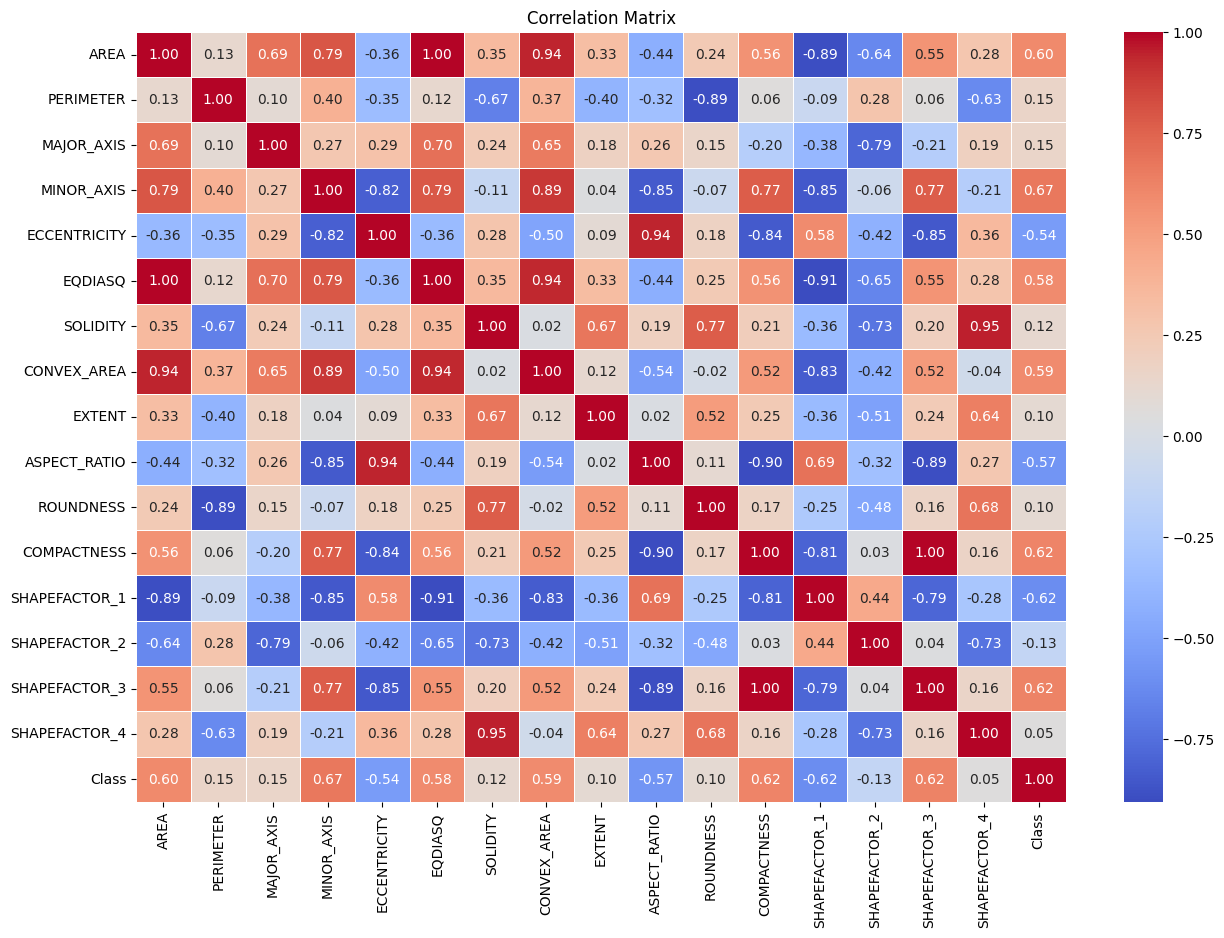

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In the above heatmap, the positive value indicates the two features are directly proportional to each other and the negative value indicates the two features are indirectly proportional to each other



# **Applying Machine Learning algorithms**

**Feature Selection**

In [23]:
x=df.drop(columns=["Class"])
y=df[["Class"]]
print(x.shape)
print(y.shape)

(1718, 16)
(1718, 1)


**Data Splitting and Traning**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1202, 16)
(516, 16)
(1202, 1)
(516, 1)


**Logistic Regression**

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predTest = model.predict(X_test)
acc_test = accuracy_score(y_test, y_predTest)
y_predTrain = model.predict(X_train)
acc_train = accuracy_score(y_train, y_predTrain)
print("Training accuracy:", acc_train*100)
print("Testing accuracy:", acc_test*100 )
class_report = classification_report(y_test, y_predTest)
print("\nClassification Report:", class_report)
cm=confusion_matrix(y_test,y_predTest)

Training accuracy: 87.35440931780366
Testing accuracy: 86.62790697674419

Classification Report:               precision    recall  f1-score   support

           0       0.90      0.89      0.89       322
           1       0.81      0.84      0.82       194

    accuracy                           0.87       516
   macro avg       0.86      0.86      0.86       516
weighted avg       0.87      0.87      0.87       516



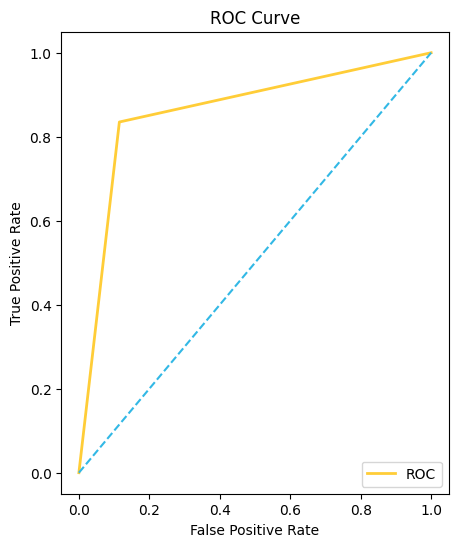

In [26]:
fpr,tpr,thresholds=roc_curve(y_test,y_predTest)
plt.figure(figsize=(5,6))
plt.plot(fpr,tpr,color='#ffcd38',label="ROC",linewidth=2)
plt.plot([0,1],[0,1],color="#32b8e5",linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

**Decision Tree**

In [27]:
classifier = DecisionTreeClassifier(random_state=10, criterion='entropy', max_depth=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc_test = accuracy_score(y_test, y_predTest)
y_predTrain = classifier.predict(X_train)
acc_train = accuracy_score(y_train, y_predTrain)
print("Training accuracy:", acc_train*100)
print("Testing accuracy:", acc_test*100 )
class_report = classification_report(y_test, y_predTest)
print("\nClassification Report:", class_report)
cm=confusion_matrix(y_test,y_predTest)


Training accuracy: 86.93843594009984
Testing accuracy: 86.62790697674419

Classification Report:               precision    recall  f1-score   support

           0       0.90      0.89      0.89       322
           1       0.81      0.84      0.82       194

    accuracy                           0.87       516
   macro avg       0.86      0.86      0.86       516
weighted avg       0.87      0.87      0.87       516



In [31]:
classifier1 = DecisionTreeClassifier(random_state=100, criterion='gini', max_depth=1)
classifier1.fit(X_train, y_train)
y_predTest = classifier1.predict(X_test)
acc_test = accuracy_score(y_test, y_predTest)
y_predTrain = classifier1.predict(X_train)
acc_train = accuracy_score(y_train, y_predTrain)
print("Training accuracy:", acc_train*100)
print("Testing accuracy:", acc_test*100 )
class_report = classification_report(y_test, y_predTest)
print("\nClassification Report:", class_report)
cm=confusion_matrix(y_test,y_predTest)

Training accuracy: 85.69051580698836
Testing accuracy: 84.88372093023256

Classification Report:               precision    recall  f1-score   support

           0       0.87      0.89      0.88       322
           1       0.81      0.79      0.80       194

    accuracy                           0.85       516
   macro avg       0.84      0.84      0.84       516
weighted avg       0.85      0.85      0.85       516



<function matplotlib.pyplot.show(close=None, block=None)>

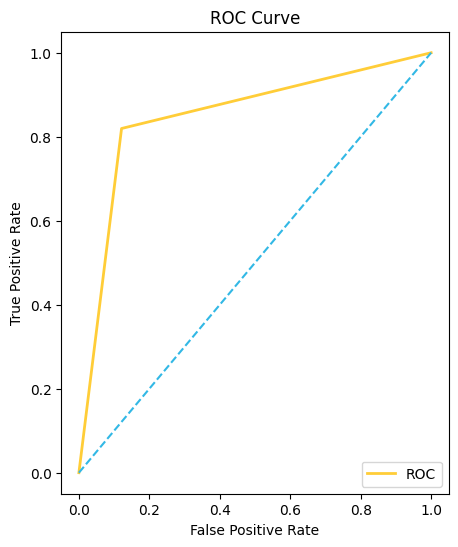

In [32]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.figure(figsize=(5,6))
plt.plot(fpr,tpr,color='#ffcd38',label="ROC",linewidth=2)
plt.plot([0,1],[0,1],color="#32b8e5",linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show

**Random Forest**

In [34]:
#perfoming Random Forest Classifier(entropy)
classifier=RandomForestClassifier(n_estimators=10, criterion="entropy")
classifier.fit(X_train, y_train)
y_predTest = classifier.predict(X_test)
acc_test = accuracy_score(y_test, y_predTest)
y_predTrain = classifier.predict(X_train)
acc_train = accuracy_score(y_train, y_predTrain)
print("Training accuracy:", acc_train*100)
print("Testing accuracy:", acc_test*100 )
class_report = classification_report(y_test, y_predTest)
print("\nClassification Report:", class_report)
cm=confusion_matrix(y_test,y_predTest)
print("Confusion Matrix:\n",cm)

Training accuracy: 99.25124792013311
Testing accuracy: 87.01550387596899

Classification Report:               precision    recall  f1-score   support

           0       0.88      0.92      0.90       322
           1       0.86      0.78      0.82       194

    accuracy                           0.87       516
   macro avg       0.87      0.85      0.86       516
weighted avg       0.87      0.87      0.87       516

Confusion Matrix:
 [[297  25]
 [ 42 152]]


In [36]:
#performing Random Forest Classifier(gini)
classifier=RandomForestClassifier(n_estimators=100, criterion="gini")
classifier.fit(X_train, y_train)
y_predTest = classifier.predict(X_test)
acc_test = accuracy_score(y_test, y_predTest)
y_predTrain = classifier.predict(X_train)
acc_train = accuracy_score(y_train, y_predTrain)
print("Training accuracy:", acc_train*100)
print("Testing accuracy:", acc_test*100 )
class_report = classification_report(y_test, y_predTest)
print("\nClassification Report:", class_report)
cm=confusion_matrix(y_test,y_predTest)
print("Confusion Matrix:\n",cm)

Training accuracy: 100.0
Testing accuracy: 88.95348837209302

Classification Report:               precision    recall  f1-score   support

           0       0.90      0.92      0.91       322
           1       0.87      0.84      0.85       194

    accuracy                           0.89       516
   macro avg       0.88      0.88      0.88       516
weighted avg       0.89      0.89      0.89       516

Confusion Matrix:
 [[297  25]
 [ 32 162]]


<function matplotlib.pyplot.show(close=None, block=None)>

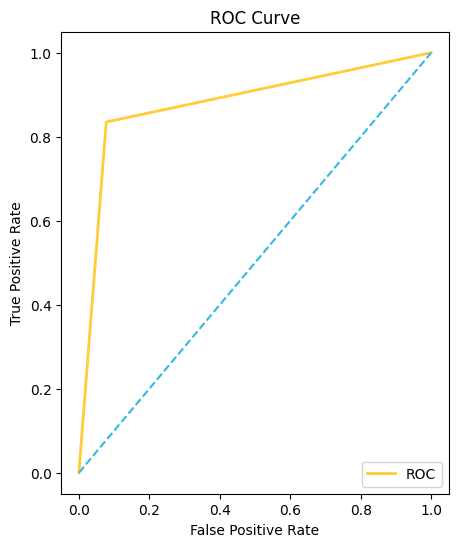

In [37]:
fpr,tpr,thresholds=roc_curve(y_test,y_predTest)
plt.figure(figsize=(5,6))
plt.plot(fpr,tpr,color='#ffcd38',label="ROC",linewidth=2)
plt.plot([0,1],[0,1],color="#32b8e5",linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show

**SVM**

In [39]:
#performing SVM
classifier=SVC(kernel='sigmoid',C=10)
classifier.fit(X_train, y_train)
y_predTest = classifier.predict(X_test)
acc_test = accuracy_score(y_test, y_predTest)
y_predTrain = classifier.predict(X_train)
acc_train = accuracy_score(y_train, y_predTrain)
print("Training accuracy:", acc_train*100)
print("Testing accuracy:", acc_test*100 )
class_report = classification_report(y_test, y_predTest)
print("\nClassification Report:", class_report)
cm=confusion_matrix(y_test,y_predTest)
print("Confusion Matrix:\n",cm)

Training accuracy: 82.61231281198003
Testing accuracy: 82.94573643410853

Classification Report:               precision    recall  f1-score   support

           0       0.88      0.84      0.86       322
           1       0.75      0.81      0.78       194

    accuracy                           0.83       516
   macro avg       0.82      0.83      0.82       516
weighted avg       0.83      0.83      0.83       516

Confusion Matrix:
 [[270  52]
 [ 36 158]]


In [40]:
classifier=SVC(kernel='linear',C=100)
classifier.fit(X_train, y_train)
y_predTest = classifier.predict(X_test)
acc_test = accuracy_score(y_test, y_predTest)
y_predTrain = classifier.predict(X_train)
acc_train = accuracy_score(y_train, y_predTrain)
print("Training accuracy:", acc_train*100)
print("Testing accuracy:", acc_test*100 )
class_report = classification_report(y_test, y_predTest)
print("\nClassification Report:", class_report)
cm=confusion_matrix(y_test,y_predTest)
print("Confusion Matrix:\n",cm)

Training accuracy: 88.01996672212978
Testing accuracy: 87.40310077519379

Classification Report:               precision    recall  f1-score   support

           0       0.90      0.89      0.90       322
           1       0.83      0.84      0.83       194

    accuracy                           0.87       516
   macro avg       0.87      0.87      0.87       516
weighted avg       0.87      0.87      0.87       516

Confusion Matrix:
 [[288  34]
 [ 31 163]]


In [41]:
classifier=SVC(kernel='poly',C=10)
classifier.fit(X_train, y_train)
y_predTest = classifier.predict(X_test)
acc_test = accuracy_score(y_test, y_predTest)
y_predTrain = classifier.predict(X_train)
acc_train = accuracy_score(y_train, y_predTrain)
print("Training accuracy:", acc_train*100)
print("Testing accuracy:", acc_test*100 )
class_report = classification_report(y_test, y_predTest)
print("\nClassification Report:", class_report)
cm=confusion_matrix(y_test,y_predTest)
print("Confusion Matrix:\n",cm)


Training accuracy: 87.93677204658901
Testing accuracy: 84.88372093023256

Classification Report:               precision    recall  f1-score   support

           0       0.85      0.91      0.88       322
           1       0.84      0.74      0.79       194

    accuracy                           0.85       516
   macro avg       0.85      0.83      0.83       516
weighted avg       0.85      0.85      0.85       516

Confusion Matrix:
 [[294  28]
 [ 50 144]]


In [42]:
classifier=SVC(kernel='rbf',C=10)
classifier.fit(X_train, y_train)
y_predTest = classifier.predict(X_test)
acc_test = accuracy_score(y_test, y_predTest)
y_predTrain = classifier.predict(X_train)
acc_train = accuracy_score(y_train, y_predTrain)
print("Training accuracy:", acc_train*100)
print("Testing accuracy:", acc_test*100 )
class_report = classification_report(y_test, y_predTest)
print("\nClassification Report:", class_report)
cm=confusion_matrix(y_test,y_predTest)
print("Confusion Matrix:\n",cm)


Training accuracy: 89.43427620632279
Testing accuracy: 88.75968992248062

Classification Report:               precision    recall  f1-score   support

           0       0.91      0.91      0.91       322
           1       0.85      0.85      0.85       194

    accuracy                           0.89       516
   macro avg       0.88      0.88      0.88       516
weighted avg       0.89      0.89      0.89       516

Confusion Matrix:
 [[293  29]
 [ 29 165]]


<function matplotlib.pyplot.show(close=None, block=None)>

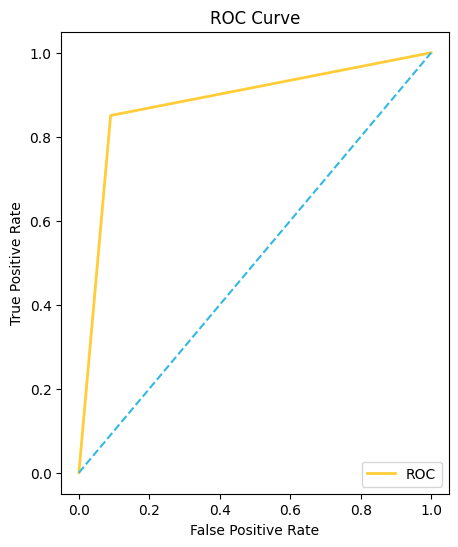

In [43]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_predTest)
plt.figure(figsize=(5,6))
plt.plot(fpr,tpr,color='#ffcd38',label="ROC",linewidth=2)
plt.plot([0,1],[0,1],color="#32b8e5",linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show

**ADA Boost**

In [44]:
ada_base=AdaBoostClassifier(learning_rate=1.5,n_estimators=10,random_state=0)
ada_base.fit(X_train,y_train)
train_ada_base_pred=ada_base.predict(X_train)
test_ada_base_pred=ada_base.predict(X_test)
train_ada_base_prob=ada_base.predict_proba(X_train)
test_ada_base_prob=ada_base.predict_proba(X_test)
print("Training Accuracy:",accuracy_score(y_train,train_ada_base_pred)*100)
print("Testing Accuracy:",accuracy_score(y_test,test_ada_base_pred)*100)
class_report = classification_report(y_test, y_predTest)
print("\nClassification Report:", class_report)
cm=confusion_matrix(y_test,y_predTest)
print("Confusion Matrix:\n",cm)


Training Accuracy: 85.19134775374376
Testing Accuracy: 84.88372093023256

Classification Report:               precision    recall  f1-score   support

           0       0.91      0.91      0.91       322
           1       0.85      0.85      0.85       194

    accuracy                           0.89       516
   macro avg       0.88      0.88      0.88       516
weighted avg       0.89      0.89      0.89       516

Confusion Matrix:
 [[293  29]
 [ 29 165]]


<function matplotlib.pyplot.show(close=None, block=None)>

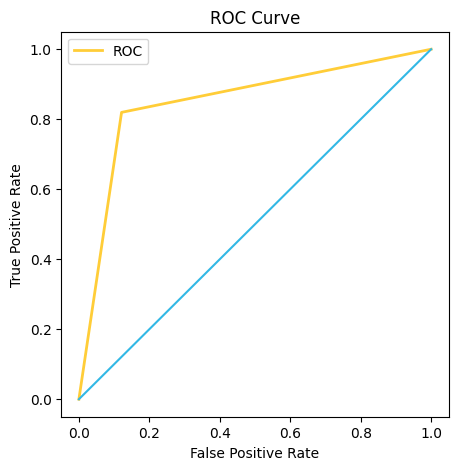

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,color='#ffcd38',label="ROC",linewidth=2)
plt.plot([0,1],[0,1],color="#32b8e5",linestyle="solid")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show

**Gradient Boost**

In [46]:
#performing gradient boosting
gb=GradientBoostingClassifier(learning_rate=1.2,n_estimators=100,random_state=0)
gb.fit(X_train,y_train)
train_ada_base_pred=ada_base.predict(X_train)
test_ada_base_pred=ada_base.predict(X_test)
train_ada_base_prob=ada_base.predict_proba(X_train)
test_ada_base_prob=ada_base.predict_proba(X_test)
print("Training Accuracy:",accuracy_score(y_train,train_ada_base_pred)*100)
print("Testing Accuracy:",accuracy_score(y_test,test_ada_base_pred)*100)
class_report = classification_report(y_test, y_predTest)
print("\nClassification Report:", class_report)
cm=confusion_matrix(y_test,y_predTest)
print("Confusion Matrix:\n",cm)


Training Accuracy: 85.19134775374376
Testing Accuracy: 84.88372093023256

Classification Report:               precision    recall  f1-score   support

           0       0.91      0.91      0.91       322
           1       0.85      0.85      0.85       194

    accuracy                           0.89       516
   macro avg       0.88      0.88      0.88       516
weighted avg       0.89      0.89      0.89       516

Confusion Matrix:
 [[293  29]
 [ 29 165]]


<function matplotlib.pyplot.show(close=None, block=None)>

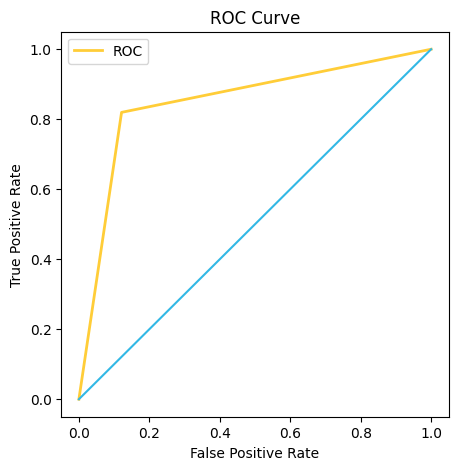

In [47]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,color='#ffcd38',label="ROC",linewidth=2)
plt.plot([0,1],[0,1],color="#32b8e5",linestyle="solid")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show

**XGBoost**

In [48]:
ada_base=XGBClassifier(learning_rate=1.5,n_estimators=10,random_state=0)
ada_base.fit(X_train,y_train)
train_ada_base_pred=ada_base.predict(X_train)
test_ada_base_pred=ada_base.predict(X_test)
train_ada_base_prob=ada_base.predict_proba(X_train)
test_ada_base_prob=ada_base.predict_proba(X_test)
print("Training Accuracy:",accuracy_score(y_train,train_ada_base_pred)*100)
print("Testing Accuracy:",accuracy_score(y_test,test_ada_base_pred)*100)
class_report = classification_report(y_test, y_predTest)
print("\nClassification Report:", class_report)
cm=confusion_matrix(y_test,y_predTest)
print("Confusion Matrix:\n",cm)

Training Accuracy: 99.91680532445923
Testing Accuracy: 84.10852713178295

Classification Report:               precision    recall  f1-score   support

           0       0.91      0.91      0.91       322
           1       0.85      0.85      0.85       194

    accuracy                           0.89       516
   macro avg       0.88      0.88      0.88       516
weighted avg       0.89      0.89      0.89       516

Confusion Matrix:
 [[293  29]
 [ 29 165]]


<function matplotlib.pyplot.show(close=None, block=None)>

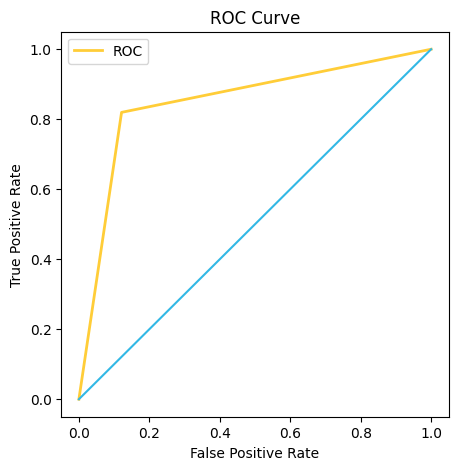

In [49]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,color='#ffcd38',label="ROC",linewidth=2)
plt.plot([0,1],[0,1],color="#32b8e5",linestyle="solid")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show

In [50]:
Training_accuracy=[87.35440931780366,86.93843594009984,85.69051580698836,99.16805324459234,100.0,82.61231281198003,88.01996672212978,87.93677204658901,89.43427620632279,85.19134775374376,85.19134775374376,99.91680532445923]
Testing_accuracy=[86.62790697674419,86.62790697674419,84.88372093023256,87.20930232558139,88.75968992248062,82.94573643410853,87.40310077519379,84.88372093023256,88.75968992248062,84.88372093023256,84.88372093023256,84.10852713178295]
Model=["Logistic Regression","Decision Tree(Entropy)","Decision Tree(GINI Index)","Random Forest(Entropy)","Random Forest(GINI Index)","SVM(Sigmoid)","SVM(Linear)","SVM(Poly)","SVM(RBF)","ADA Boost","Gradient Boost","XG Boost"]
dictionary= {'Model':Model,'Training_accuracy':Training_accuracy,'Testing_accuracy':Testing_accuracy}
m = pd.DataFrame(dictionary)
m

Model  Training_accuracy  Testing_accuracy
0         Logistic Regression          87.354409         86.627907
1      Decision Tree(Entropy)          86.938436         86.627907
2   Decision Tree(GINI Index)          85.690516         84.883721
3      Random Forest(Entropy)          99.168053         87.209302
4   Random Forest(GINI Index)         100.000000         88.759690
5                SVM(Sigmoid)          82.612313         82.945736
6                 SVM(Linear)          88.019967         87.403101
7                   SVM(Poly)          87.936772         84.883721
8                    SVM(RBF)          89.434276         88.759690
9                   ADA Boost          85.191348         84.883721
10             Gradient Boost          85.191348         84.883721
11                   XG Boost          99.916805         84.108527

**Visualising the models and their accuracy scores using Barplot**

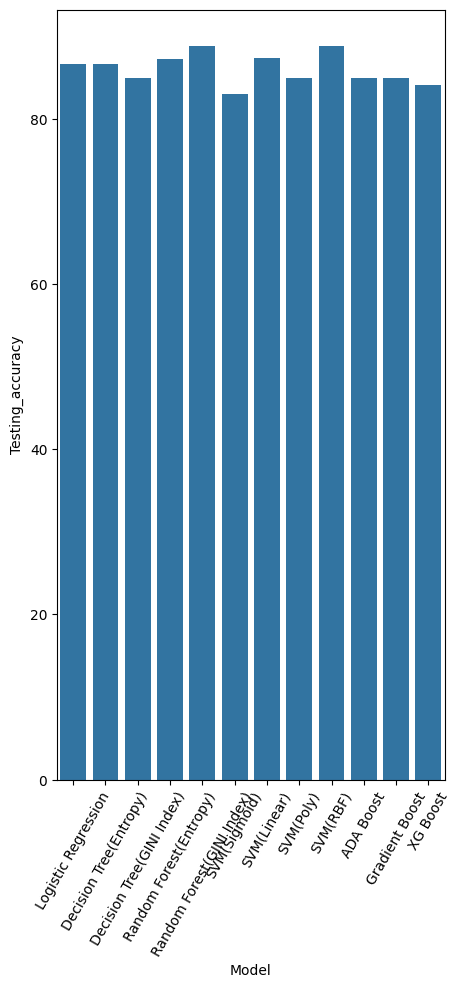

In [58]:
ax=sns.barplot(x='Model',y='Testing_accuracy',data=m)
ax.bar_label(a.containers[0])
fig=plt.gcf()
fig.set_size_inches(5,10)
plt.xticks(rotation=60)
plt.show()

## **Conclusion**

*   By observing the above models, we can conclude that all the models are performed wellwith accuracy scores close to each other.
*   The dataset encompasses various machine learning models with diverse performance metrics.
*   Models like Random Forest (GINI Index) achieve perfect training accuracy (100%) but exhibit lower testing accuracy (88.76%), indicating potential overfitting. SVM with Linear kernel performs consistently well on testing data (88.76%), while decision tree models generally show lower accuracies.
* Logistic Regression offers stable performance across both training (87.35%) and testing (86.63%) datasets.


